In [142]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Import Twitter API Keys
from config import consumer_key, consumer_secret, access_token, access_token_secret

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [143]:
# Target User Accounts and create lists to hold tweets for each news org
news_orgs = ["@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes"]
bbc_tweets = []
cbs_tweets = []
cnn_tweets = []
fn_tweets = []
nyt_tweets = []
bbc_sentiments = []
cbs_sentiments = []
cnn_sentiments = []
fn_sentiments = []
nyt_sentiments = []
counter = 1

#gather tweets for each news org
counter = 1
for x in range (1, 6):
    public_tweets = api.user_timeline("@BBC", page=x)
    for tweet in public_tweets:
        bbc_tweets.append(tweet["text"])
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter
        bbc_sentiments.append({ 
            "Compound": compound,
            "Positive": pos,
            "Negative": neu,
            "Neutral": neg,
            "Tweets Ago": counter})
        counter += 1
    
counter = 1            
for x in range (1, 6):
    public_tweets = api.user_timeline("@CBS", page=x)
    for tweet in public_tweets:
        cbs_tweets.append(tweet["text"])
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter
        cbs_sentiments.append({ 
            "Compound": compound,
            "Positive": pos,
            "Negative": neu,
            "Neutral": neg,
            "Tweets Ago": counter})
        counter += 1
        
counter = 1            
for x in range (1, 6):
    public_tweets = api.user_timeline("@CNN", page=x)   
    for tweet in public_tweets:
        cnn_tweets.append(tweet["text"])
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter
        cnn_sentiments.append({ 
            "Compound": compound,
            "Positive": pos,
            "Negative": neu,
            "Neutral": neg,
            "Tweets Ago": counter})
        counter += 1

counter = 1
for x in range (1, 6):
    public_tweets = api.user_timeline("@FoxNews", page=x)  
    for tweet in public_tweets:
        fn_tweets.append(tweet["text"])
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter
        fn_sentiments.append({ 
            "Compound": compound,
            "Positive": pos,
            "Negative": neu,
            "Neutral": neg,
            "Tweets Ago": counter})
        counter += 1
    
counter = 1                
for x in range (1, 6):
    public_tweets = api.user_timeline("@nytimes", page=x)  
    for tweet in public_tweets:
        nyt_tweets.append(tweet["text"])
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter
        nyt_sentiments.append({ 
            "Compound": compound,
            "Positive": pos,
            "Negative": neu,
            "Neutral": neg,
            "Tweets Ago": counter})
        counter += 1

In [154]:
# Convert sentiments to DataFrame
bbc_sentiments_pd = pd.DataFrame.from_dict(bbc_sentiments)
cbs_sentiments_pd = pd.DataFrame.from_dict(cbs_sentiments)
cnn_sentiments_pd = pd.DataFrame.from_dict(cnn_sentiments)
fn_sentiments_pd = pd.DataFrame.from_dict(fn_sentiments)
nyt_sentiments_pd = pd.DataFrame.from_dict(nyt_sentiments)

bbc_sentiments_pd.to_csv('bbc.csv')
cbs_sentiments_pd.to_csv('cbs.csv')
cnn_sentiments_pd.to_csv('cnn.csv')
fn_sentiments_pd.to_csv('fn.csv')
nyt_sentiments_pd.to_csv('nyt.csv')

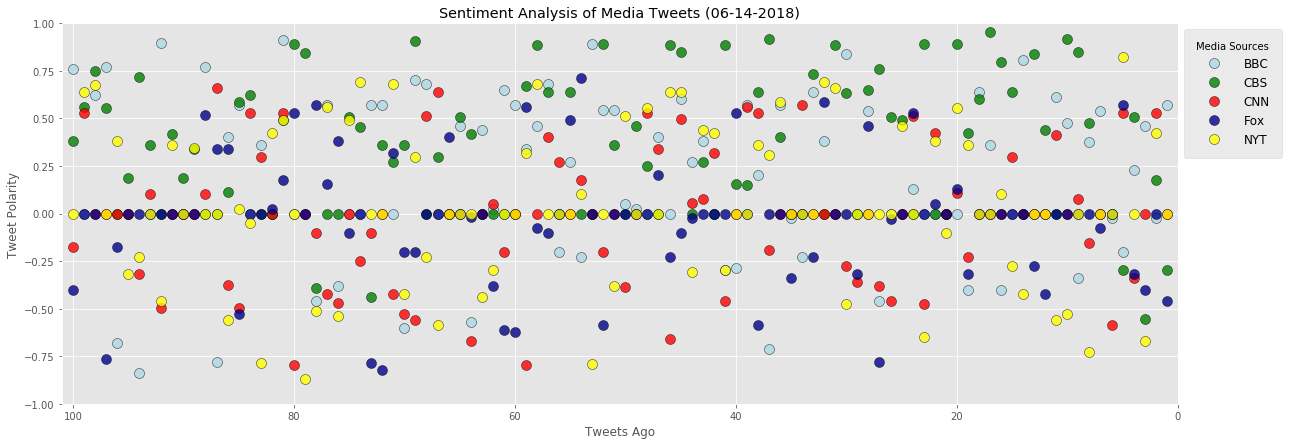

In [149]:
# Create Sentiment Analysis Plot
plt.figure(figsize=(20, 7))
BBC = plt.scatter(bbc_sentiments_pd["Tweets Ago"], bbc_sentiments_pd["Compound"], s=100, marker="o", linewidth=0.5, 
                alpha=0.8, facecolors='lightblue', edgecolors="black", label = 'BBC')
CBS = plt.scatter(cbs_sentiments_pd["Tweets Ago"], cbs_sentiments_pd["Compound"], s=100, marker="o", linewidth=0.5, 
                alpha=0.8, facecolors='green', edgecolors="black", label = 'CBS')
CNN = plt.scatter(cnn_sentiments_pd["Tweets Ago"], cnn_sentiments_pd["Compound"], s=100, marker="o", linewidth=0.5, 
                alpha=0.8,  facecolors='red', edgecolors="black", label = 'CNN')
Fox = plt.scatter(fn_sentiments_pd["Tweets Ago"], fn_sentiments_pd["Compound"], s=100, marker="o", linewidth=0.5, 
                  alpha=0.8,  facecolors='darkblue',edgecolors="black", label = 'Fox')
NYT = plt.scatter(nyt_sentiments_pd["Tweets Ago"], nyt_sentiments_pd["Compound"], s=100, marker="o", linewidth=0.5, 
                  alpha=0.8,  facecolors='yellow',edgecolors="black", label = 'NYT')

lgnd = plt.legend(ncol = 1, frameon=True, fontsize=12, handlelength=3, handleheight=1,
                  borderpad=1, handletextpad=1, scatterpoints=1, title="Media Sources", bbox_to_anchor = (1.0, 1.0))

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%m-%d-%Y")
plt.title(f"Sentiment Analysis of Media Tweets ({now})") 
plt.xlim([101, 0])
plt.ylim([-1, 1])
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.savefig('totalsentiment.png')
plt.show()

In [150]:
#get averages for bar plot
bbc_avg = bbc_sentiments_pd["Compound"].mean()
cnn_avg = cnn_sentiments_pd["Compound"].mean()
cbs_avg = cbs_sentiments_pd["Compound"].mean()
nyt_avg = nyt_sentiments_pd["Compound"].mean()
fox_avg = fn_sentiments_pd["Compound"].mean()

news_avg = [bbc_avg, cnn_avg, cbs_avg, nyt_avg, fox_avg]
total_avgs = {"Org": news_orgs, "Compound Average": news_avg}
total_pd = pd.DataFrame(total_avgs, index = news_orgs)
total_pd

,Compound Average,Org
@BBC,0.175711,@BBC
@CBS,-0.011822,@CBS
@CNN,0.341145,@CNN
@FoxNews,0.036088,@FoxNews
@nytimes,-0.027218,@nytimes


No handles with labels found to put in legend.


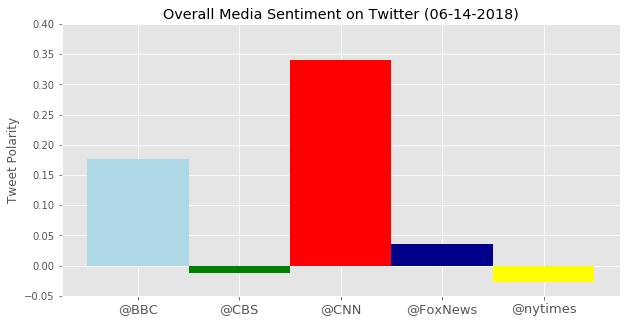

In [151]:
#Create Bar Chart
colors = ['lightblue', 'green', 'red', 'darkblue', 'yellow']

plt.figure(figsize=(10,5))

plt.bar(total_pd['Org'], total_pd['Compound Average'], color=colors, width=1.0)

# Set the xlabel and ylabel using class methods
plt.ylabel("Tweet Polarity")
plt.title(f"Overall Media Sentiment on Twitter ({now})") 
plt.xticks(fontsize=13)
plt.ylim(-0.05, 0.4)
legend = plt.legend()
legend.remove()
plt.savefig('avgtentiment.png')

plt.show()

In [ ]:
'''
Trends:
1. The only useful information we get from the total sentiments scatter plot is that most news media tweets are unbiased, 
most likely just facts about a news event

2. The past 100 tweets on 6/14/18 from Fox NYT and CBS averged closest to zero, showing the least politarty when judged by 
the vader analyzer. 

3. CNN's past 100 tweets from 6/14 seem to be the most positive of the news orgs. 

'''